In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/btc-usd/BTC-USD.csv


# Load Data

In [24]:
data = pd.read_csv('/kaggle/input/btc-usd/BTC-USD.csv')
print(data.head())

         Date          Open          High           Low         Close  \
0  2023-03-13  22156.406250  24550.837891  21918.199219  24197.533203   
1  2023-03-14  24201.765625  26514.716797  24081.183594  24746.074219   
2  2023-03-15  24770.925781  25240.615234  23964.910156  24375.960938   
3  2023-03-16  24373.457031  25190.326172  24225.111328  25052.789063   
4  2023-03-17  25055.123047  27787.812500  24955.169922  27423.929688   

      Adj Close       Volume  
0  24197.533203  49466362688  
1  24746.074219  54622230164  
2  24375.960938  43655701450  
3  25052.789063  33866061747  
4  27423.929688  50730261335  


# Import necessary Python libraries

In [14]:
!pip install prophet

In [16]:
import pandas as pd
from prophet import Prophet

The facebook Prophet model only works with data that contains a string time-series format in a column Called "ds" and continuos values in a column called "y". So we need to create the data accordingly.

In [30]:
df = pd.read_csv('/kaggle/input/btc-usd/BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2023-03-13  24197.533203
1    2023-03-14  24746.074219
2    2023-03-15  24375.960938
3    2023-03-16  25052.789063
4    2023-03-17  27423.929688
..          ...           ...
362  2024-03-09  68498.882813
363  2024-03-10  69019.789063
364  2024-03-11  72123.906250
365  2024-03-12  71481.289063
366  2024-03-13  73287.273438

[367 rows x 2 columns]


# Flit the data into the model

In [31]:
prophet = Prophet()
prophet.fit(df)

12:20:55 - cmdstanpy - INFO - Chain [1] start processing
12:20:55 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = prophet.make_future_dataframe(periods=60)
print(future)

            ds
0   2023-03-13
1   2023-03-14
2   2023-03-15
3   2023-03-16
4   2023-03-17
..         ...
422 2024-05-08
423 2024-05-09
424 2024-05-10
425 2024-05-11
426 2024-05-12

[427 rows x 1 columns]


In [36]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
227,2023-10-26,31928.153346,27993.007141,35626.085141
228,2023-10-27,32139.635153,28557.031637,36231.920088
229,2023-10-28,32214.993230,27961.241950,35864.499635
230,2023-10-29,32355.354759,28513.757665,36120.391870
231,2023-10-30,32668.677701,28563.102633,36665.115551
...,...,...,...,...
422,2024-05-08,74344.410831,69890.484514,78588.671423
423,2024-05-09,74177.876397,70232.509219,78225.244149
424,2024-05-10,74485.955083,70274.190746,78633.823672
425,2024-05-11,74657.910038,70495.507200,79252.782189


# Plot the predictions

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


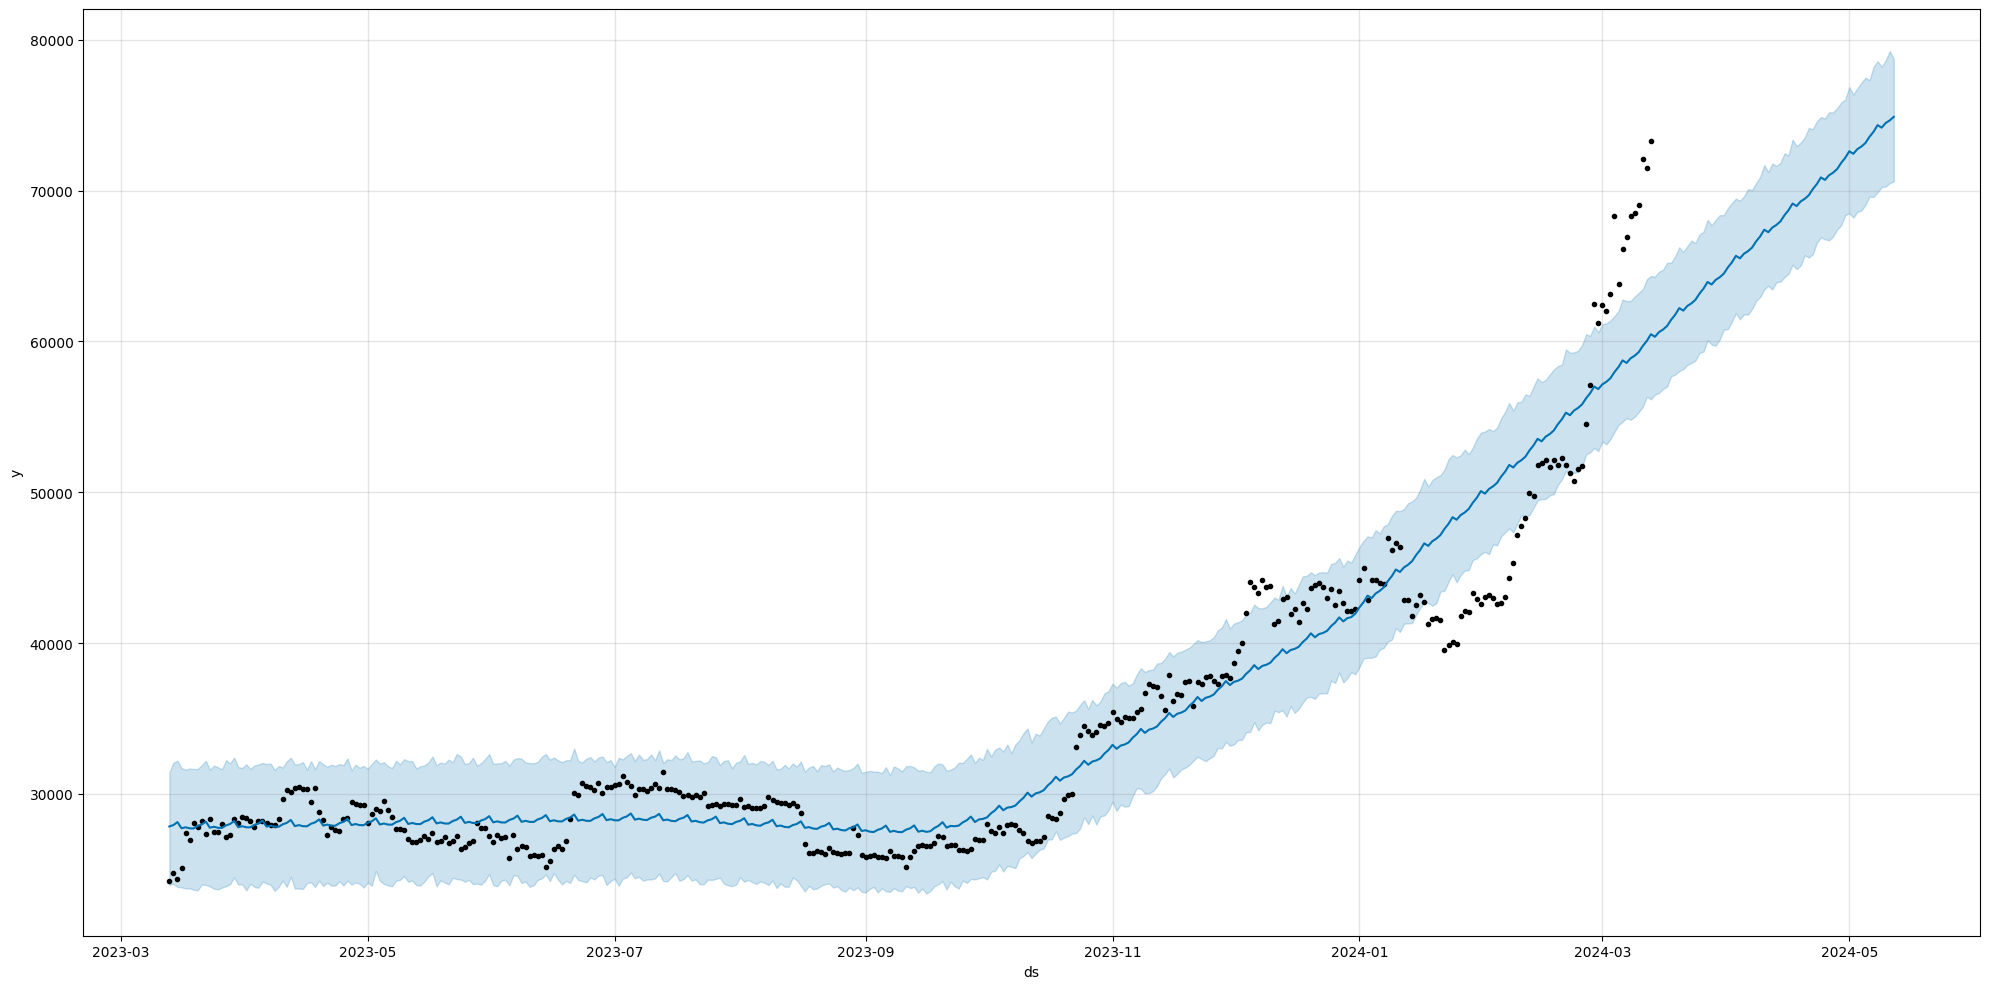

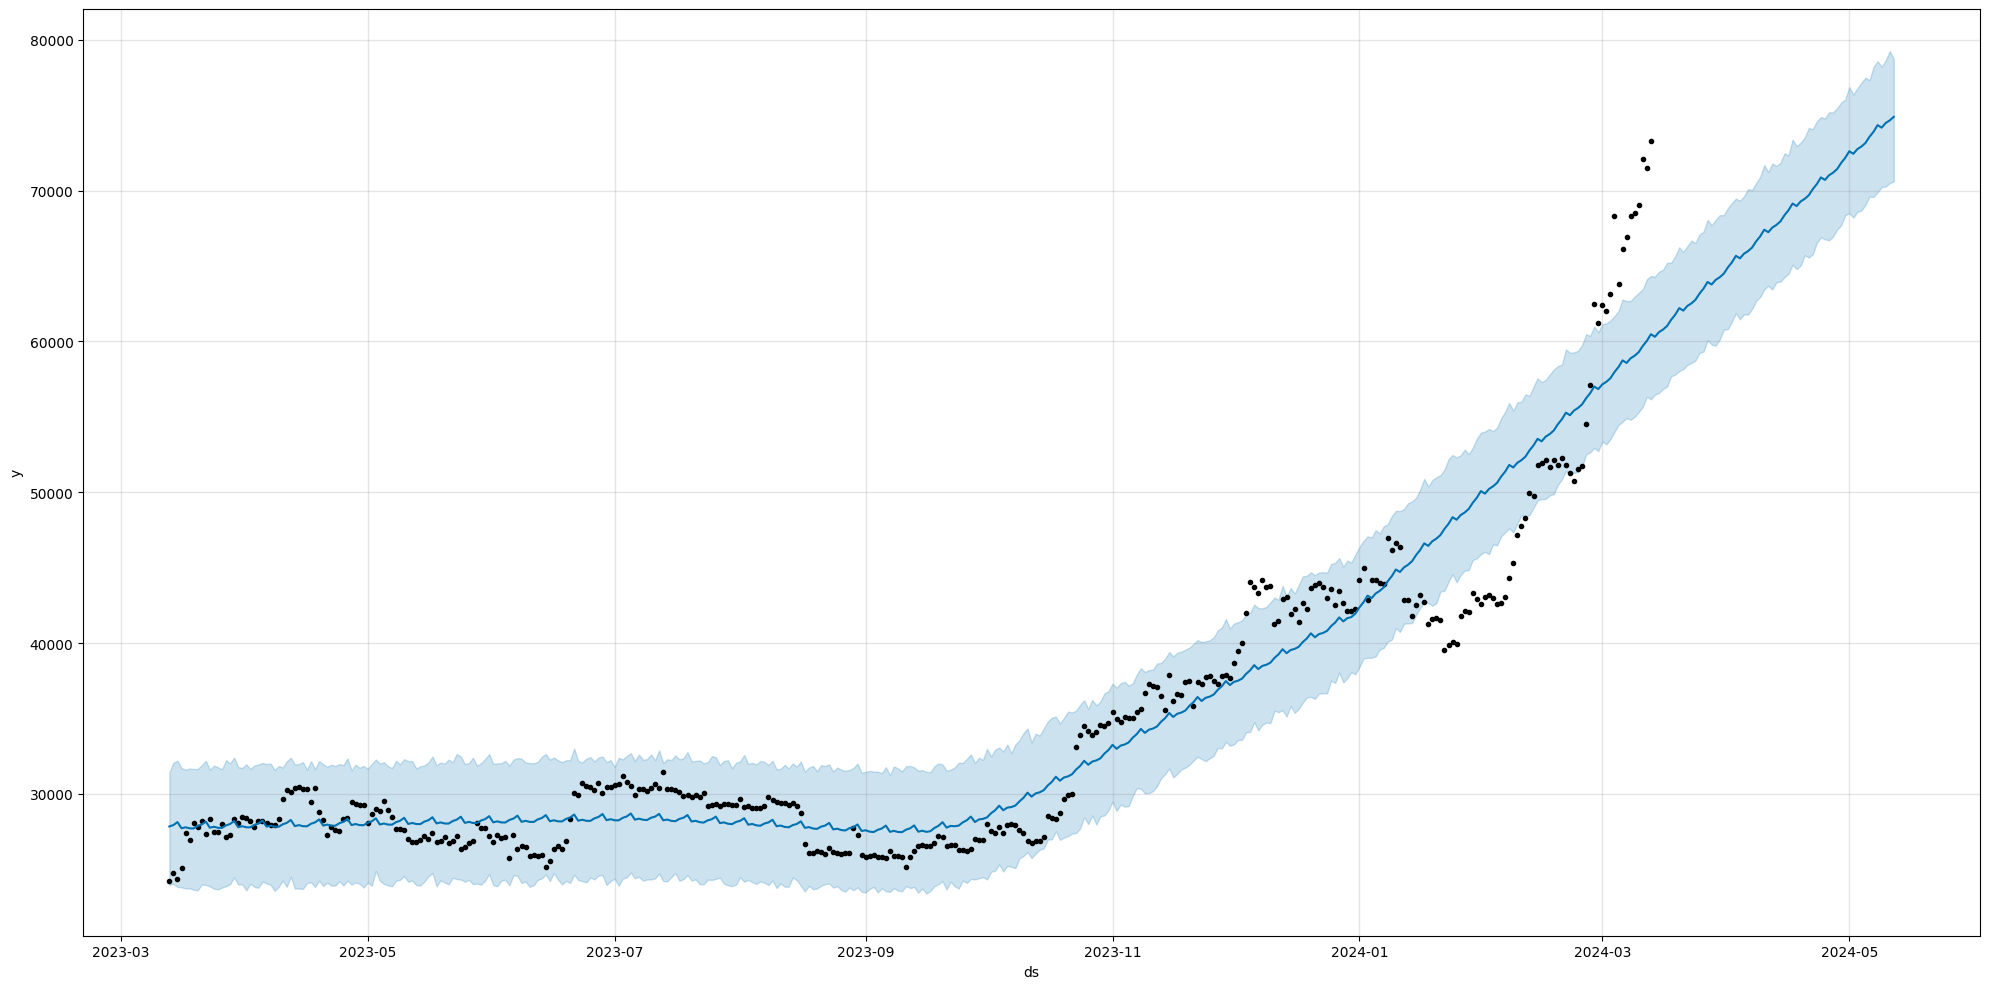

In [37]:
from prophet.plot import plot
prophet.plot(forecast, figsize=(20,10))